## Variance Threshold

Variance threshold removes all features whose variance doesn’t meet a specified threshold.

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.feature_selection import VarianceThreshold

In [2]:
# iris data set
iris = load_iris()

In [3]:
print(iris['DESCR'])
print(iris['filename'])
print(iris['feature_names'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
# put the data into a data frame

# Extract the data
data_iris = pd.DataFrame(iris['data'], columns=iris['feature_names'])
# Extract the target
target_iris = pd.DataFrame(iris['target'], columns=['class'])
# Combine into one data set
df_iris = pd.concat([target_iris, data_iris], axis='columns')

df_iris.head()

,class,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0,5.1,3.5,1.4,0.2
1,0,4.9,3.0,1.4,0.2
2,0,4.7,3.2,1.3,0.2
3,0,4.6,3.1,1.5,0.2
4,0,5.0,3.6,1.4,0.2


In [5]:
# load features and target (X and y)
X, y = load_iris(return_X_y=True)

In [6]:
vt = VarianceThreshold(threshold=0.2)
X_new = vt.fit_transform(X)

In [7]:
X_new.shape

(150, 3)

In [8]:
X.var(axis=0)

array([0.68112222, 0.18871289, 3.09550267, 0.57713289])

In [9]:
X_new.var(axis=0)

array([0.68112222, 3.09550267, 0.57713289])

## Mutual information (entropy) gain

### Classification

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test=train_test_split(df_iris.drop(labels=['class'], axis=1), df_iris['class'], test_size=0.2, random_state=0)

In [12]:
from sklearn.feature_selection import mutual_info_classif

In [13]:
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.52407609, 0.33469056, 0.98457531, 0.98850257])

In [14]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

petal width (cm)     0.988503
petal length (cm)    0.984575
sepal length (cm)    0.524076
sepal width (cm)     0.334691
dtype: float64

<AxesSubplot:>

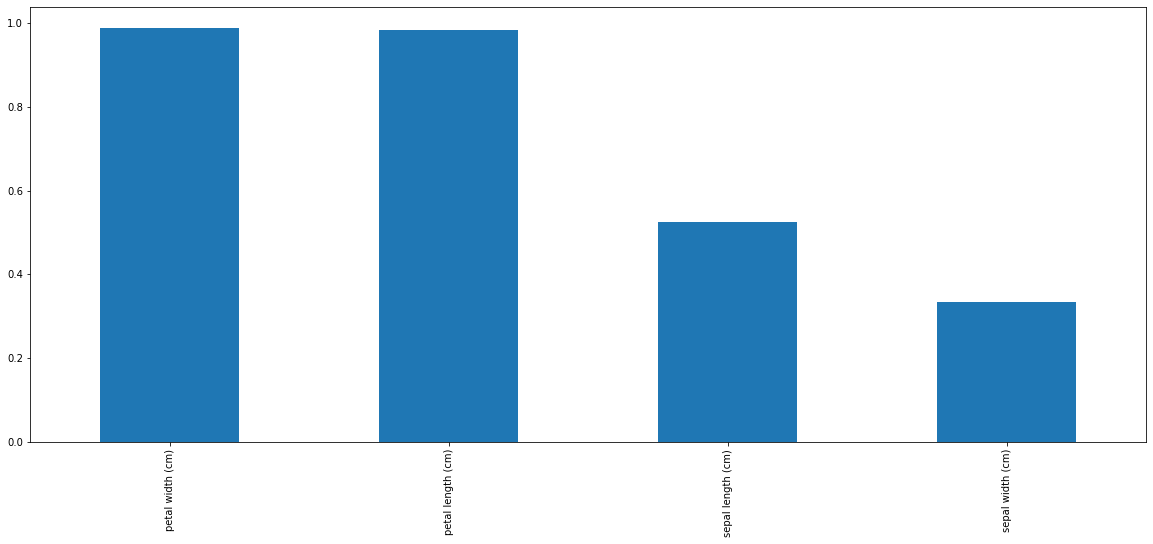

In [15]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

### Select K Best

In [16]:
from sklearn.feature_selection import SelectKBest

In [17]:
selectK = SelectKBest(mutual_info_classif, k=3)
selectK.fit(X_train, y_train)
X_train.columns[selectK.get_support()]

Index(['sepal length (cm)', 'petal length (cm)', 'petal width (cm)'], dtype='object')

#### You can use other statistical tests, e.g. chi-squared test, ANOVA F-test.

### Regression

In [21]:
# read data
df_income = pd.read_csv('income_data_2.csv')

In [22]:
X_train,X_test,y_train,y_test=train_test_split(df_income.drop(labels=['Income'], axis=1), df_income['Income'], test_size=0.2, random_state=0)

In [23]:
from sklearn.feature_selection import mutual_info_regression

In [24]:
mutual_info = mutual_info_regression(X_train.fillna(0), y_train)
mutual_info

array([0.40614756, 0.06332323])

In [25]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Age          0.406148
Education    0.063323
dtype: float64

<AxesSubplot:>

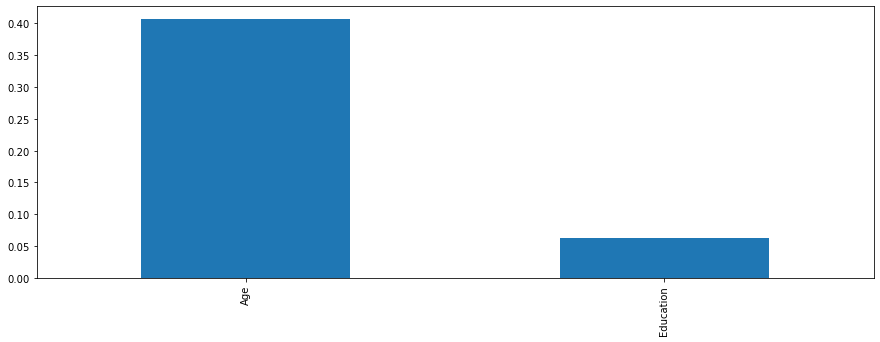

In [26]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

### Select Percentile

In [27]:
from sklearn.feature_selection import SelectPercentile

In [28]:
selected_top_features = SelectPercentile(mutual_info_regression, percentile=20)
selected_top_features.fit(X_train.fillna(0), y_train)
selected_top_features.get_support()

array([ True, False])

In [29]:
X_train.columns[selected_top_features.get_support()]

Index(['Age'], dtype='object')

## Visualisation

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# Create a correlation matrix
corr_matrix = df_income.corr().abs()

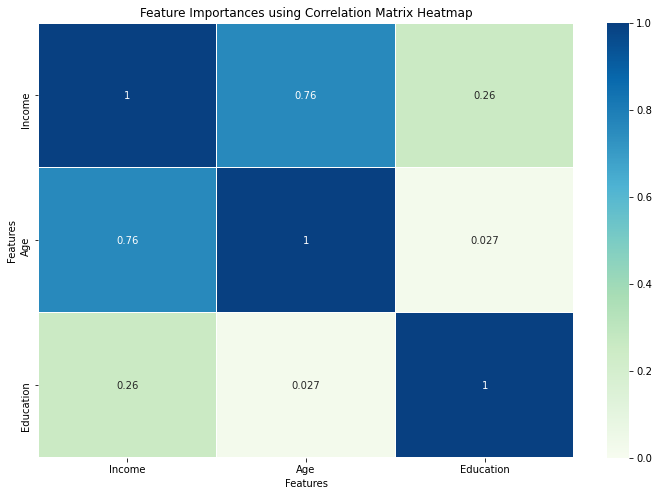

In [34]:
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='GnBu', linewidths=0.2, vmin=0, vmax=1)
plt.xlabel('Features')
plt.ylabel('Features')
plt.title('Feature Importances using Correlation Matrix Heatmap')
plt.show()